## 차원 축소

!! 이 파일에 작성하지 마시고 복제해서 써주세요 !!

실습 과정을 따라하면서 빈칸을 채워주세요 :)

#### 1. PCA

In [1]:
# 1. 필요한 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
# 2. 데이터 불러오기 및 정규화
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

# 데이터 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

🔎 Quiz 1: PCA 진행 시 왜 스케일링 할까요?

답: 각 변수들의 크기나 단위를 맞추지 않을 경우, 분산이 큰 변수만 주성분으로 나올 수 있기 때문에..

In [9]:
# 3. PCA 적용
# 기존의 4차원 데이터를 2차원 데이터로 축소해주세요.

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print("Original shape:", X_scaled.shape)
print("Reduced shape:", X_pca.shape)

Original shape: (150, 4)
Reduced shape: (150, 2)


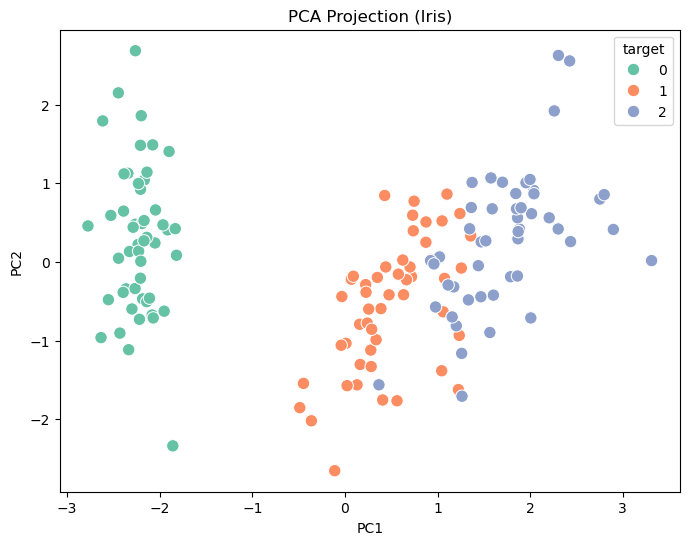

In [11]:
# 4. 시각화
df_pca = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
df_pca["target"] = y

plt.figure(figsize=(8,6))
sns.scatterplot(data=df_pca, x="PC1", y="PC2", hue="target", palette="Set2", s=80)
plt.title("PCA Projection (Iris)")
plt.show()

Explained variance ratio: [0.72962445 0.22850762]
누적 설명력: [0.72962445 0.95813207]


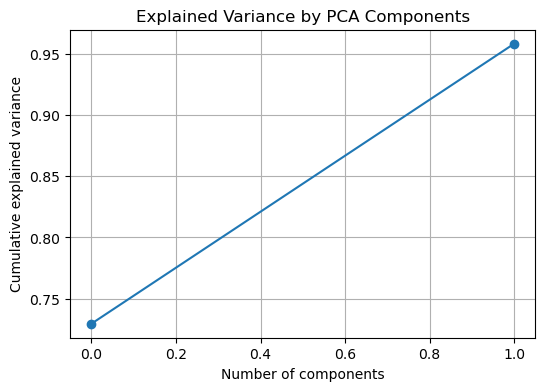

In [13]:
# 5. 분산 설명력 확인
print("Explained variance ratio:", pca.explained_variance_ratio_)
print("누적 설명력:", np.cumsum(pca.explained_variance_ratio_))

plt.figure(figsize=(6,4))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance")
plt.title("Explained Variance by PCA Components")
plt.grid(True)
plt.show()

🔎 Quiz 2: 각 주성분이 전체 분산의 몇 %를 설명하는지 써주세요.

답: 72.96%, 22.85%

#### 2. LDA

In [17]:
# 1. 필요한 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [19]:
# 2. 데이터 불러오기
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

# 정규화 (LDA는 필수는 아니지만 일반적으로 적용)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [23]:
# 3. LDA 적
# LDA는 n_classes - 1 개의 축만 생성 가능합니다. (iris는 3개의 클래스를 가지고 있습니다.)
# 2개의 축으로 설정해주세요.

lda = LDA(n_components=2)
X_lda = lda.fit_transform(X_scaled, y)

print("Original shape:", X_scaled.shape)
print("Reduced shape:", X_lda.shape)

Original shape: (150, 4)
Reduced shape: (150, 2)


🔎 Quiz 3: 왜 LDA는 n_classes - 1개의 축만 생성될까요?

답:클래스가 n개 일때, 클래스의 중심점들이 가질수있는 독립적인 방향이 n-1개라서

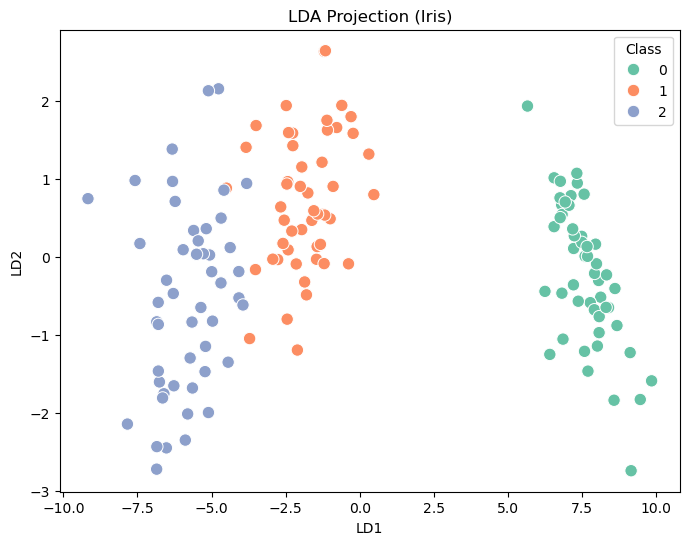

In [26]:
# 4. 시각화
df_lda = pd.DataFrame(X_lda, columns=['LD1', 'LD2'])
df_lda['target'] = y


plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_lda, x='LD1', y='LD2', hue='target', palette='Set2', s=80)
plt.title("LDA Projection (Iris)")
plt.xlabel("LD1")
plt.ylabel("LD2")
plt.legend(title='Class')
plt.show()

#### 3. t-SNE / UMAP

In [28]:
# 1. 필요한 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import umap.umap_ as umap  # pip install umap-learn

In [30]:
# 2. 데이터 로딩 및 스케일링
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

# 이전에 사용했던 방식으로 표준화를 진행해주세요.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

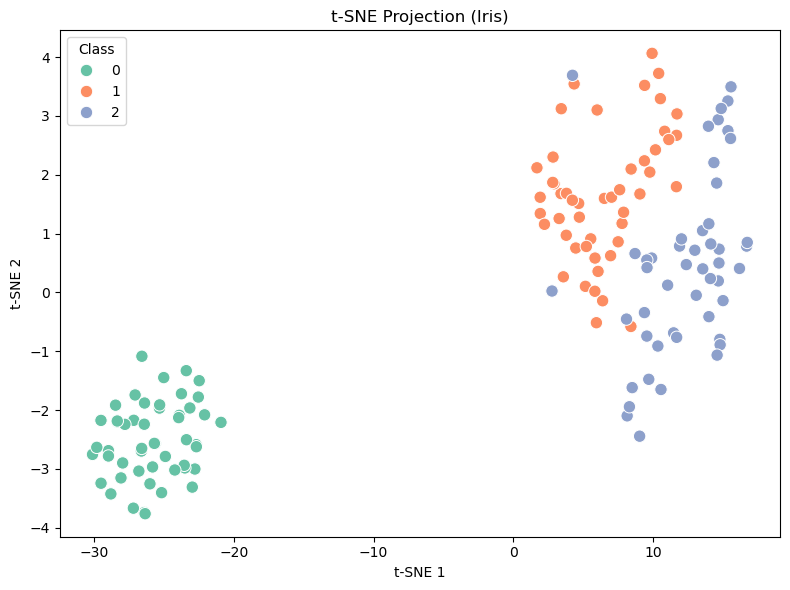

In [46]:
# t-SNE 적용
# 2차원으로 축소해주세요.
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X_scaled)

# 시각화
df_tsne = pd.DataFrame(X_tsne, columns=["x", "y"])
df_tsne['target'] = y

plt.figure(figsize=(8,6))
sns.scatterplot(data=df_tsne, x="x", y="y", hue="target", palette="Set2", s=80)
plt.title("t-SNE Projection (Iris)")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.legend(title='Class')
plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


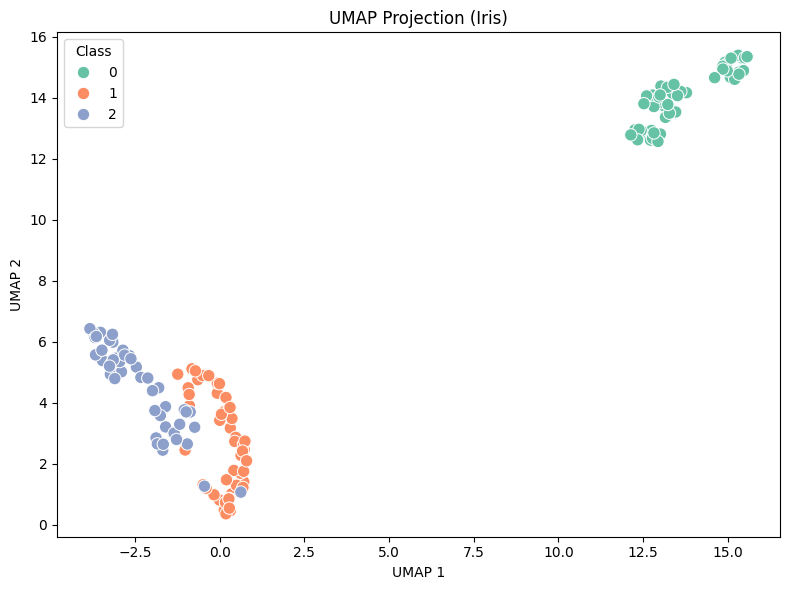

In [ ]:
# UMAP 적용
# 2차원으로 축소해주세요.
umap_model = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=_______, random_state=42)
X_umap = umap_model.fit_transform(X_scaled)

# 시각화
df_umap = pd.DataFrame(X_umap, columns=["x", "y"])
df_umap['target'] = y

plt.figure(figsize=(8,6))
sns.scatterplot(data=df_umap, x="x", y="y", hue="target", palette="Set2", s=80)
plt.title("UMAP Projection (Iris)")
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.legend(title='Class')
plt.tight_layout()
plt.show()

🔎 Quiz 4: 각 기법의 특징과 시각화 결과를 비교해주세요.

답: t-SNE는 각 클래스 내부의 국소관계는 잘 보여주지만, 클러스터 간의 거리는 신뢰하기 어려움.   
UMAP의 경우 국소 관계와 전역관계를 모두 잘 나타내기 때문에 거리 구조를 해석하는데 좋음.